In [3]:
import pandas as pd
#Function to read and process the Worldbank data
def process_worldbank_data(filename):
    # Read the file, skipping the initial rows
    df = pd.read_csv(filename, skiprows=4)
    #Setting the first two columns ('Country Name' and 'Country Code') as a MultiIndex
    df.set_index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True)
    #Transposing the dataframe to get years as columns
    df_transposed = df.transpose()
    #The transposed dataframe will have years as its index
    #Cleaning up the index to have proper year values
    df_transposed.index = pd.to_numeric(df_transposed.index, errors='coerce')
    df_transposed.dropna(inplace=True)
    #Resetting index for ease of use
    df_transposed.reset_index(inplace=True)
    df_transposed.rename(columns={'index': 'Year'}, inplace=True)
    #Returning two dataframes: one with countries and indicators as rows, and another with years as rows
    return df, df_transposed
# Path to your dataset
file_path = 'C:\\Users\\LENOVO\\Downloads\\API_19_DS2_en_csv_v2_5998250.csv'
# Processing the data
df_countries_indicators, df_years = process_worldbank_data(file_path)
df_countries_indicators, df_years

(                                                                                                     1960  \
 Country Name Country Code Indicator Name                                     Indicator Code                 
 Aruba        ABW          Urban population (% of total population)           SP.URB.TOTL.IN.ZS     50.776   
                           Urban population                                   SP.URB.TOTL        27728.000   
                           Urban population growth (annual %)                 SP.URB.GROW              NaN   
                           Population, total                                  SP.POP.TOTL        54608.000   
                           Population growth (annual %)                       SP.POP.GROW              NaN   
 ...                                                                                                   ...   
 Zimbabwe     ZWE          Rural land area where elevation is below 5 mete... AG.LND.EL5M.RU.ZS        NaN   
          

In [7]:
#Statistical Summary
#Filter the dataset for the chosen indicators
indicators = ["Urban population (% of total population)", "Urban population"]
df_selected_indicators = df_countries_indicators.loc[(slice(None), slice(None), indicators), :]
#Statistical summary
statistical_summary = df_selected_indicators.describe()
statistical_summary

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,5.250000e+02,5.250000e+02,5.250000e+02,5.250000e+02,5.250000e+02,5.250000e+02,5.250000e+02,5.250000e+02,5.250000e+02,5.250000e+02,...,5.260000e+02,5.260000e+02,5.260000e+02,5.260000e+02,5.260000e+02,5.260000e+02,5.260000e+02,5.260000e+02,5.260000e+02,5.260000e+02
mean,1.776262e+07,1.829653e+07,1.889732e+07,1.956075e+07,2.024340e+07,2.082775e+07,2.142728e+07,2.204137e+07,2.267214e+07,2.332020e+07,...,7.458809e+07,7.629967e+07,7.803213e+07,7.977152e+07,8.151770e+07,8.325169e+07,8.496886e+07,8.666038e+07,8.824421e+07,8.977076e+07
std,8.079284e+07,8.311441e+07,8.574242e+07,8.865611e+07,9.165274e+07,9.416928e+07,9.675068e+07,9.939011e+07,1.020977e+08,1.048781e+08,...,3.347690e+08,3.424852e+08,3.502591e+08,3.580383e+08,3.658427e+08,3.735406e+08,3.811169e+08,3.885171e+08,3.954259e+08,4.019701e+08
min,2.077000e+00,2.115000e+00,2.154000e+00,2.193000e+00,2.233000e+00,2.294000e+00,2.395000e+00,2.501000e+00,2.611000e+00,2.726000e+00,...,1.148200e+01,1.177600e+01,1.207800e+01,1.238800e+01,1.270600e+01,1.303200e+01,1.325000e+01,1.334500e+01,1.345600e+01,1.358200e+01
25%,3.316800e+01,3.356000e+01,3.440400e+01,3.476200e+01,3.528212e+01,3.579100e+01,3.619000e+01,3.686400e+01,3.748800e+01,3.834500e+01,...,5.737825e+01,5.756950e+01,5.785836e+01,5.819769e+01,5.866506e+01,5.937850e+01,6.010475e+01,6.088105e+01,6.161150e+01,6.218630e+01
50%,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,...,2.688000e+03,2.705000e+03,2.721500e+03,2.739500e+03,2.762000e+03,2.787000e+03,2.815000e+03,2.843500e+03,2.874500e+03,2.908500e+03
75%,8.947620e+05,9.634240e+05,1.037708e+06,1.117692e+06,1.188812e+06,1.237813e+06,1.274988e+06,1.312793e+06,1.350994e+06,1.404638e+06,...,4.964444e+06,5.140176e+06,5.247923e+06,5.351144e+06,5.445917e+06,5.618250e+06,5.737816e+06,5.853274e+06,5.985732e+06,6.117753e+06
max,1.018332e+09,1.047044e+09,1.079079e+09,1.114084e+09,1.149981e+09,1.181114e+09,1.212813e+09,1.245129e+09,1.278253e+09,1.312228e+09,...,3.824216e+09,3.904322e+09,3.985252e+09,4.066426e+09,4.147430e+09,4.227440e+09,4.306261e+09,4.383700e+09,4.453949e+09,4.523091e+09


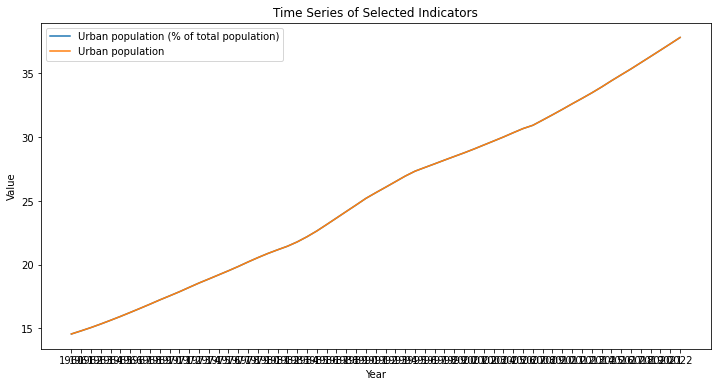

In [15]:
import matplotlib.pyplot as plt
urban_population_percentage_mean = df_selected_indicators.iloc[1, :]
urban_population_mean = df_selected_indicators.iloc[1, :]
#Extracting the years
years = df_selected_indicators.columns
#Creating the line chart
plt.figure(figsize=(12, 6))
plt.plot(years, urban_population_percentage_mean, label="Urban population (% of total population)")
plt.plot(years, urban_population_mean, label="Urban population")
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Time Series of Selected Indicators')
plt.legend()
plt.show()